In [1]:
%matplotlib
import pandas as pd


Using matplotlib backend: MacOSX


In [2]:
# Import dataset 
mv_df = pd.read_csv('cleaned_data.csv')
pd.set_option('display.max_columns', None)
mv_df.head()

,title,rated,released,runtime,director,writer,actors,plot,language,country,awards,ratings,metascore,imdbrating,imdbvotes,dvd,boxoffice,response,genre,star,budget,gross,year,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,Inception,PG-13,2010-07-16,148,Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,"English, Japanese, French","United Kingdom, United States",Won 4 Oscars. 157 wins & 220 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",74.0,8.8,NaN,07 Dec 2010,NaN,True,Action,Leonardo DiCaprio,160000000.0,836836967.0,2010,8.8,87.0,74.0
1,Iron Man 2,PG-13,2010-05-07,124,Jon Favreau,"Justin Theroux, Stan Lee, Don Heck","Robert Downey Jr., Mickey Rourke, Gwyneth Paltrow",With the world now aware of his identity as Ir...,"English, French, Russian",United States,Nominated for 1 Oscar. 7 wins & 44 nominations...,"[{'Source': 'Internet Movie Database', 'Value'...",57.0,7.0,NaN,17 Aug 2010,NaN,True,Action,Robert Downey Jr.,200000000.0,623933331.0,2010,7.0,72.0,57.0
2,Shutter Island,R,2010-02-19,138,Martin Scorsese,"Laeta Kalogridis, Dennis Lehane","Leonardo DiCaprio, Emily Mortimer, Mark Ruffalo","In 1954, a U.S. Marshal investigates the disap...","English, German",United States,11 wins & 66 nominations,"[{'Source': 'Internet Movie Database', 'Value'...",63.0,8.2,NaN,08 Jun 2010,NaN,True,Mystery,Leonardo DiCaprio,80000000.0,294805697.0,2010,8.2,68.0,63.0
3,Scott Pilgrim vs. the World,PG-13,2010-08-13,112,Edgar Wright,"Michael Bacall, Edgar Wright, Bryan Lee O'Malley","Michael Cera, Mary Elizabeth Winstead, Kieran ...","In a magically realistic version of Toronto, a...",English,"United States, United Kingdom, Canada, Japan",17 wins & 64 nominations,"[{'Source': 'Internet Movie Database', 'Value'...",69.0,7.5,NaN,09 Nov 2010,NaN,True,Action,Michael Cera,60000000.0,48917974.0,2010,7.5,82.0,69.0
4,Grown Ups,PG-13,2010-06-25,102,Dennis Dugan,"Adam Sandler, Fred Wolf","Adam Sandler, Salma Hayek, Kevin James",After their high school basketball coach passe...,"English, Spanish",United States,3 wins & 4 nominations,"[{'Source': 'Internet Movie Database', 'Value'...",30.0,6.0,NaN,09 Nov 2010,NaN,True,Comedy,Adam Sandler,80000000.0,271457301.0,2010,6.0,11.0,30.0


In [3]:
mv_df['profit'] = mv_df['gross']- mv_df['budget']

In [4]:
# Check for any nulls
mv_df.isnull().sum()

title                                0
rated                               21
released                             0
runtime                              0
director                             8
writer                               3
actors                               0
plot                                 0
language                             3
country                              1
awards                             120
ratings                              0
metascore                           88
imdbrating                           0
imdbvotes                         1749
dvd                                 38
boxoffice                         1770
response                             0
genre                                0
star                                 0
budget                             422
gross                                7
year                                 0
internet_movie_database_rating       0
rotten_tomato_rating                 0
metacritic_rating        

In [5]:
# Count number of row
print(len(mv_df))

1774


In [6]:
# Print out all columns
mv_df.columns

Index(['title', 'rated', 'released', 'runtime', 'director', 'writer', 'actors',
       'plot', 'language', 'country', 'awards', 'ratings', 'metascore',
       'imdbrating', 'imdbvotes', 'dvd', 'boxoffice', 'response', 'genre',
       'star', 'budget', 'gross', 'year', 'internet_movie_database_rating',
       'rotten_tomato_rating', 'metacritic_rating', 'profit'],
      dtype='object')

In [7]:
# Select columns for ML models
cols = ['rated', 'director','metascore',
       'imdbrating', 'genre', 'profit', 'star', 'internet_movie_database_rating',
       'rotten_tomato_rating', 'metacritic_rating']

In [8]:
mv_drop_df = mv_df[cols].copy()
mv_drop_df

,rated,director,metascore,imdbrating,genre,profit,star,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,PG-13,Christopher Nolan,74.0,8.8,Action,676836967.0,Leonardo DiCaprio,8.8,87.0,74.0
1,PG-13,Jon Favreau,57.0,7.0,Action,423933331.0,Robert Downey Jr.,7.0,72.0,57.0
2,R,Martin Scorsese,63.0,8.2,Mystery,214805697.0,Leonardo DiCaprio,8.2,68.0,63.0
3,PG-13,Edgar Wright,69.0,7.5,Action,-11082026.0,Michael Cera,7.5,82.0,69.0
4,PG-13,Dennis Dugan,30.0,6.0,Comedy,191457301.0,Adam Sandler,6.0,11.0,30.0
...,...,...,...,...,...,...,...,...,...,...
1769,Not Rated,"Jason Kwan, Jing Wong",NaN,5.8,Action,NaN,Tony Ka Fai Leung,5.8,75.0,0.0
1770,NaN,Dylan Thomas Ellis,NaN,4.7,Family,NaN,Cole Allen,4.7,60.0,0.0
1771,R,Jeffrey Nicholson,NaN,3.0,Action,NaN,Michael Saquella,3.0,0.0,0.0
1772,NaN,David Stuart Snell,NaN,4.8,Drama,NaN,Alexandra Bokova,4.8,0.0,0.0


In [9]:
# Drop any nulls 
mv_drop_df = mv_drop_df.dropna()
mv_drop_df

,rated,director,metascore,imdbrating,genre,profit,star,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,PG-13,Christopher Nolan,74.0,8.8,Action,676836967.0,Leonardo DiCaprio,8.8,87.0,74.0
1,PG-13,Jon Favreau,57.0,7.0,Action,423933331.0,Robert Downey Jr.,7.0,72.0,57.0
2,R,Martin Scorsese,63.0,8.2,Mystery,214805697.0,Leonardo DiCaprio,8.2,68.0,63.0
3,PG-13,Edgar Wright,69.0,7.5,Action,-11082026.0,Michael Cera,7.5,82.0,69.0
4,PG-13,Dennis Dugan,30.0,6.0,Comedy,191457301.0,Adam Sandler,6.0,11.0,30.0
...,...,...,...,...,...,...,...,...,...,...
1712,PG,Alex Kendrick,17.0,6.7,Drama,33026103.0,Alex Kendrick,6.7,56.0,17.0
1714,PG-13,Tyler Perry,39.0,4.5,Comedy,54747725.0,Tyler Perry,4.5,11.0,39.0
1718,PG-13,Ry Russo-Young,52.0,5.9,Drama,-2249971.0,Yara Shahidi,5.9,52.0,52.0
1729,R,"Chuck Konzelman, Cary Solomon",10.0,5.9,Biography,15354152.0,Ashley Bratcher,5.9,42.0,10.0


In [52]:
mv_drop_df.rated.value_counts()

R            591
PG-13        537
PG           181
G             11
Not Rated      9
TV-MA          2
Unrated        1
NC-17          1
Name: rated, dtype: int64

In [54]:
mv_drop_df.star.value_counts()

Mark Wahlberg          13
Steve Carell           12
Matt Damon             12
Matthew McConaughey    12
Adam Sandler           10
                       ..
Brit Marling            1
Sarah Butler            1
KiKi Layne              1
Suraj Sharma            1
Kenneth Branagh         1
Name: star, Length: 647, dtype: int64

In [10]:
# Check categorical data
print(mv_drop_df.genre.nunique())
print(mv_drop_df.rated.nunique())
print(mv_drop_df.director.nunique())
print(mv_drop_df.star.nunique())

13
8
815
647


In [11]:
# Reduce more features
mv_red_df = mv_drop_df.drop(columns=['director']).copy()
mv_red_df

,rated,metascore,imdbrating,genre,profit,star,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,PG-13,74.0,8.8,Action,676836967.0,Leonardo DiCaprio,8.8,87.0,74.0
1,PG-13,57.0,7.0,Action,423933331.0,Robert Downey Jr.,7.0,72.0,57.0
2,R,63.0,8.2,Mystery,214805697.0,Leonardo DiCaprio,8.2,68.0,63.0
3,PG-13,69.0,7.5,Action,-11082026.0,Michael Cera,7.5,82.0,69.0
4,PG-13,30.0,6.0,Comedy,191457301.0,Adam Sandler,6.0,11.0,30.0
...,...,...,...,...,...,...,...,...,...
1712,PG,17.0,6.7,Drama,33026103.0,Alex Kendrick,6.7,56.0,17.0
1714,PG-13,39.0,4.5,Comedy,54747725.0,Tyler Perry,4.5,11.0,39.0
1718,PG-13,52.0,5.9,Drama,-2249971.0,Yara Shahidi,5.9,52.0,52.0
1729,R,10.0,5.9,Biography,15354152.0,Ashley Bratcher,5.9,42.0,10.0


In [12]:
# Encode categorical data to numerical
mv_encoded = pd.get_dummies(mv_red_df)
mv_encoded.shape

(1333, 674)

In [13]:
# Standardize the datset
from sklearn.preprocessing import StandardScaler,MinMaxScaler

mv_scaled = StandardScaler().fit_transform(mv_encoded)
mv_scaled

array([[ 1.0686757 ,  2.63064981,  2.45490477, ..., -0.02739983,
        -0.02739983, -0.04749357],
       [ 0.08921119,  0.55570532,  1.33231467, ..., -0.02739983,
        -0.02739983, -0.04749357],
       [ 0.43490454,  1.93900165,  0.40403775, ..., -0.02739983,
        -0.02739983, -0.04749357],
       ...,
       [-0.19886661, -0.71231632, -0.55943019, ..., -0.02739983,
        -0.02739983, -0.04749357],
       [-2.6187201 , -0.71231632, -0.4812889 , ..., -0.02739983,
        -0.02739983, -0.04749357],
       [ 0.55013566, -0.25121754, -0.54999154, ..., -0.02739983,
        -0.02739983, -0.04749357]])

## Unsupervised algorithm

In [14]:
# PCA dimentional reduction
from sklearn.decomposition import PCA
mv_pca = PCA(n_components=0.9).fit_transform(mv_scaled)
mv_pca.shape


(1333, 586)

In [15]:
# Create PCA dataframe
mv_pca_df = pd.DataFrame(data=mv_pca, index=mv_encoded.index)
mv_pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585
0,-3.923407,1.074630,-2.682235,1.262968,-0.633302,-0.095132,-0.269808,-0.224264,-0.147305,-0.342870,0.278600,-0.184592,0.557984,-0.537809,3.764410,-1.152995,0.516078,0.401453,-0.335713,-0.522471,0.073476,-0.102640,-1.357405,-0.142581,-0.225501,0.075661,0.034278,0.149981,-0.444943,0.062612,0.092797,0.342795,-0.010204,-0.283538,-0.073740,-0.289899,0.928619,-1.024667,0.480903,-0.136582,-0.281515,0.506946,0.159632,0.109324,-0.381891,-1.463290,0.119384,0.221349,-1.041908,-1.305156,0.400308,-1.590624,0.824253,-0.999053,-1.543154,10.961722,0.060238,-0.214975,0.359659,-0.872873,-0.585340,-0.531182,0.350176,0.731236,2.570885,-1.445062,2.457118,-0.786754,0.977056,-0.028907,-0.012256,-0.079501,0.177383,0.466987,-0.100804,-0.067196,-0.033923,0.239056,-0.231844,0.586044,0.014191,-0.803017,3.720157e-13,-9.390881e-13,1.096856e-12,-1.672933e-12,1.324323e-12,7.402336e-14,2.530194e-12,-1.103817e-12,3.949657e-13,-1.347001e-12,9.599408e-14,-4.991819e-13,-7.049662e-13,6.631061e-13,1.185682e-12,-2.361516e-12,9.306835e-14,-1.341554e-13,2.495830e-13,-9.059734e-13,6.319776e-13,1.232559e-12,-0.023794,-0.100904,-0.149606,-0.047567,0.206833,-0.131205,0.254227,0.049126,-0.221167,-0.416001,-0.253232,0.138983,0.046278,-0.347769,1.103786e-12,3.699855e-13,5.414291e-13,1.878611e-12,-1.050648e-12,-6.130707e-13,-1.189191e-13,-2.430059e-13,1.463690e-12,2.273963e-12,1.486378e-12,3.194425e-13,-1.218972e-12,-2.174375e-12,-1.137863e-12,6.748049e-13,8.946674e-14,1.056101e-12,1.119396e-12,-5.690110e-13,3.077916e-12,1.218834e-12,7.142121e-13,1.855428e-12,-0.015496,0.041481,0.077972,0.003914,0.054846,-0.019665,0.113213,0.311497,-0.054738,0.099685,-0.030697,-0.019483,-0.140574,-0.301527,-0.490058,-0.457373,-0.010926,1.027480e-13,7.775524e-13,6.076033e-13,-4.014250e-13,1.738748e-13

In [16]:
# Try t-SNE
from sklearn.manifold import TSNE
tsne_features = TSNE(learning_rate=200).fit_transform(mv_pca_df)
tsne_features.shape

(1333, 2)

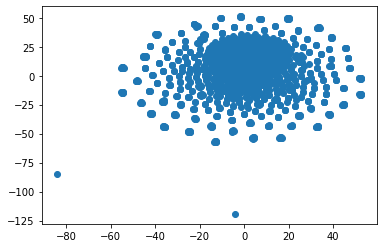

In [17]:
# Preview the classification
import matplotlib.pyplot as plt

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [18]:
# Trying K-means
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values

for i in k:
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(tsne_features)
  inertia.append(km.inertia_)

# Create the Elbow curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,k,inertia
0,1,1.355162e+06
1,2,8.893918e+05
2,3,6.141791e+05
3,4,4.847674e+05
4,5,4.019481e+05
5,6,3.302027e+05
6,7,2.899566e+05
7,8,2.510546e+05
8,9,2.256852e+05
9,10,2.037342e+05


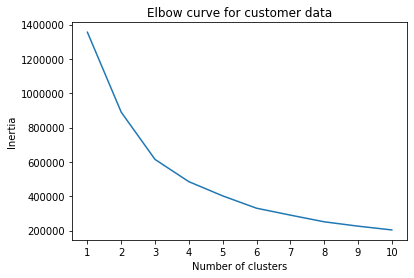

In [19]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [20]:
# Initialize the k-means model, using k=4
model = KMeans(n_clusters=3, random_state=0)
model.fit(tsne_features)

# Predict clusters
preds = model.predict(tsne_features)
preds

array([1, 1, 1, ..., 2, 0, 0], dtype=int32)

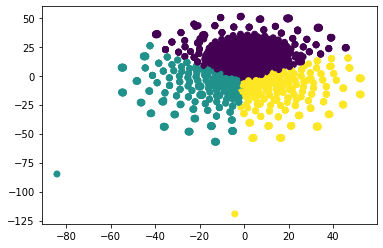

In [21]:
# Plot T-SNE reduced dimentions results with labels
plt.scatter(tsne_features[:, 0], tsne_features[:,1], c = model.labels_ )
plt.show()

## Another unsupervised learning

In [73]:
mv_unsup_df = mv_red_df.copy()

In [74]:
mv_unsup_df

,rated,metascore,imdbrating,genre,profit,star,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,PG-13,74.0,8.8,Action,676836967.0,Leonardo DiCaprio,8.8,87.0,74.0
1,PG-13,57.0,7.0,Action,423933331.0,Robert Downey Jr.,7.0,72.0,57.0
2,R,63.0,8.2,Mystery,214805697.0,Leonardo DiCaprio,8.2,68.0,63.0
3,PG-13,69.0,7.5,Action,-11082026.0,Michael Cera,7.5,82.0,69.0
4,PG-13,30.0,6.0,Comedy,191457301.0,Adam Sandler,6.0,11.0,30.0
...,...,...,...,...,...,...,...,...,...
1712,PG,17.0,6.7,Drama,33026103.0,Alex Kendrick,6.7,56.0,17.0
1714,PG-13,39.0,4.5,Comedy,54747725.0,Tyler Perry,4.5,11.0,39.0
1718,PG-13,52.0,5.9,Drama,-2249971.0,Yara Shahidi,5.9,52.0,52.0
1729,R,10.0,5.9,Biography,15354152.0,Ashley Bratcher,5.9,42.0,10.0


In [75]:
stars  = mv_unsup_df['star'].value_counts()

In [76]:
stars_filtered = stars[stars>2]
stars_filtered

Mark Wahlberg          13
Steve Carell           12
Matt Damon             12
Matthew McConaughey    12
Adam Sandler           10
                       ..
Colin Farrell           3
Taraji P. Henson        3
Josh Brolin             3
David Oyelowo           3
Jason Sudeikis          3
Name: star, Length: 140, dtype: int64

In [77]:
# Cutting some data from star column
stars_replace = stars[stars<2].index.to_list()

for star in stars_replace:
  mv_unsup_df['star'] = mv_unsup_df['star'].replace(star, 'other')
mv_unsup_df['star'].value_counts()

other                  404
Mark Wahlberg           13
Steve Carell            12
Matt Damon              12
Matthew McConaughey     12
                      ... 
Claire Foy               2
Chris Brown              2
Elizabeth Olsen          2
Matthew Broderick        2
Al Pacino                2
Name: star, Length: 244, dtype: int64

In [78]:
# Encode categorical data to numerical
mv_converted = pd.get_dummies(mv_unsup_df)
mv_converted.shape

(1333, 271)

In [79]:
# Standardize the datset

mv_scaled = StandardScaler().fit_transform(mv_converted)
mv_scaled

array([[ 1.0686757 ,  2.63064981,  2.45490477, ..., -0.04749357,
        -0.04749357, -0.65945145],
       [ 0.08921119,  0.55570532,  1.33231467, ..., -0.04749357,
        -0.04749357, -0.65945145],
       [ 0.43490454,  1.93900165,  0.40403775, ..., -0.04749357,
        -0.04749357, -0.65945145],
       ...,
       [-0.19886661, -0.71231632, -0.55943019, ..., -0.04749357,
        -0.04749357,  1.51641187],
       [-2.6187201 , -0.71231632, -0.4812889 , ..., -0.04749357,
        -0.04749357,  1.51641187],
       [ 0.55013566, -0.25121754, -0.54999154, ..., -0.04749357,
        -0.04749357,  1.51641187]])

In [80]:
# PCA dimentional reduction

mv_pca = PCA(n_components=0.9).fit_transform(mv_scaled)
mv_pca.shape


(1333, 229)

In [81]:
# Create PCA dataframe
mv_pca_df = pd.DataFrame(data=mv_pca, index=mv_converted.index)
mv_pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228
0,-4.127610,2.219011,-2.196992,-1.047152,-0.998993,-0.658546,3.043949,1.897436,-0.563130,-0.252130,0.407114,0.130341,-0.255292,-0.300626,0.029295,0.117719,-0.832529,-0.657272,0.808329,-0.917597,1.500244,0.185144,2.494506,-0.040330,-0.231514,0.188015,0.048117,0.407026,-0.406793,0.102852,-0.098027,0.822382,-0.430928,0.025389,-0.495790,-0.795876,0.797372,0.891653,0.165117,-0.176016,-0.298843,0.237623,0.069274,-0.524623,-2.496463,-0.068734,-0.062376,-0.633976,-2.606666,-1.453354,-1.096538,-1.706731,-2.700699,-2.080765,0.030655,8.634121,0.203051,-0.436771,0.079587,1.753170,-1.999310,-0.724006,0.132141,1.340143,-0.488916,3.677998,1.851765,1.966357,0.843219,0.062586,-0.002586,-0.285744,0.208131,-1.190351,0.159885,-0.083575,0.217004,-0.826966,0.151389,-0.518654,0.419374,0.701738,5.288912e-14,9.005858e-13,-8.848550e-13,9.536771e-13,2.120084e-13,-1.544197e-12,1.071848e-12,-2.696841e-12,4.484534e-13,-1.534986e-12,-1.700888e-12,8.685534e-13,-1.037722e-13,-3.401142e-13,-1.870089e-13,9.466363e-13,-6.872374e-13,-3.893838e-13,1.404351e-13,-5.105717e-13,1.453953e-12,-3.010410e-13,-0.059884,-0.368440,-0.213312,0.299348,-0.297596,0.163941,0.322862,0.169765,-0.025814,-0.081524,-0.367466,0.443425,-0.208288,-0.245901,-1.469131e-12,2.925106e-13,-1.751418e-12,3.799364e-13,-7.665860e-14,1.177461e-12,-1.420752e-12,-1.196562e-12,7.673152e-13,2.234449e-13,3.705077e-13,4.874384e-13,1.174798e-12,-3.522872e-13,-3.787277e-13,3.992091e-14,2.918607e-13,-1.055720e-12,2.424669e-13,2.645705e-12,1.432990e-14,2.243009e-12,2.279468e-13,2.189240e-12,-0.071353,-0.095708,0.069784,-0.078053,0.189628,-0.223001,0.007833,-0.117377,-0.274115,0.364394,-0.000455,-0.467678,0.498797,-0.354013,-0.124847,0.116394,-3.480825e-13,-4.129389e-14,4.643107e-13,4.197367e-13,-8.101985e-13,-1.074814e-13,-3.969347e-13,1.091293e-13,5.688606e-15,3.224124e-13,1.254361e-12,2.751764e-13,-5.491961e-13,6.969730e-13,-1.179593e-13,-1.896096e-13,-2.079035e-13,-1.251176e-13,-5.125291e-14,4.225731e-13,-3.046494e-13,-5.687655e-13,-1.951457e-13,3.644511e-13,7.323882e-14,-3.720570e-14,2.204454e-13,3.600143e-13,6.097108e-13,-9.174659e-14,7.559032e-13,4.329679e-13,4.303692e-13,2.160719e-13,1.627036e-13,7.067538e-13,-1.664432e-13,-6.174197e-13,7.153699e-13,-5.394826e-13,-1.599148e-13,3.141727e-13,2.529924e-13,-7.399466e-13,-2.452597e-13,-7.555229e-14,6.964501e-13,5.553125e-14,-7.368250e-14,2.736869e-13,1.108565e-13,-3.349815e-14,-5.110000e-13,-1.667601e-13,3.001492e-13,5.227813e-13,1.099216e-13,-2.513445e-13,1.784859e-13,8.130269e-13,5.265843e-13,1.245155e-13,6.495469e-13,4.280874e-13,-4.390552e-14,-7.687382e-13,1.968036e-14,3.005137e-13,1.618098e-13,-4.942590e-13,-1.148179e-13
1,-1.070364,3.124156,-2.223534,-1.544344,-0.875838,-0.154857,-0.697694,0.299651,-0.576848,-0.835636,1.372631,0.022946,-0.479664,-1.022887,0.619050,0.444510,-2.268390,-2.078740,1.181377,-1.216711,1.538475,0.812904,-0.970043,-1.255404,-0.368047,0.053231,0.298776,-2.054036,4.829519,0.134010,0.790399,-1.387855,-0.025574,-0.439429,-0.648694,3.082183,-4.108340,-1.653663,-2.245288,-0.924286,1.575227,-0.949449,-0.358637,2.110045,1.483623,0.064822,0.103540,-0.188628,0.865767,0.165858,0.158258,0.561684,1.769115,-1.036978,-1.440974,0.718035,0.062886,-0.0

In [82]:
# Try t-SNE
from sklearn.manifold import TSNE
tsne_features = TSNE(learning_rate=200).fit_transform(mv_pca_df)
tsne_features.shape

(1333, 2)

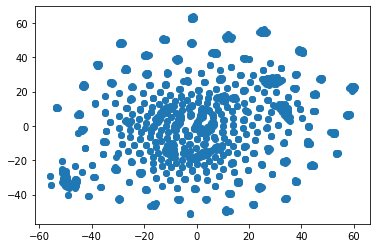

In [83]:

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [84]:
# Trying K-means
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values

for i in k:
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(tsne_features)
  inertia.append(km.inertia_)

# Create the Elbow curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,k,inertia
0,1,1.687351e+06
1,2,1.033589e+06
2,3,7.331103e+05
3,4,5.387596e+05
4,5,4.356530e+05
5,6,3.595038e+05
6,7,3.032827e+05
7,8,2.632655e+05
8,9,2.383939e+05
9,10,2.131283e+05


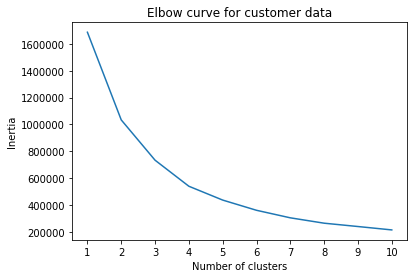

In [85]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [86]:
# Initialize the k-means model, using k=3
model = KMeans(n_clusters=3, random_state=0)
model.fit(tsne_features)

# Predict clusters
preds = model.predict(tsne_features)
preds

array([0, 0, 0, ..., 1, 2, 2], dtype=int32)

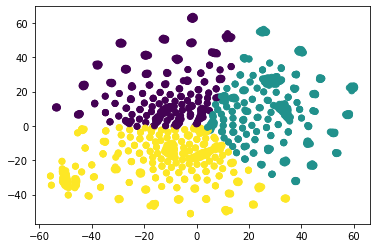

In [87]:
# Plot T-SNE reduced dimentions results with labels
plt.scatter(tsne_features[:, 0], tsne_features[:,1], c = model.labels_ )
plt.show()

In [88]:
# Try dendrogram ploting to see potentials clusters
from scipy.cluster.hierarchy import dendrogram, linkage

In [89]:
# Perform hierarchical clustering
mergings = linkage(mv_pca_df, method='ward')

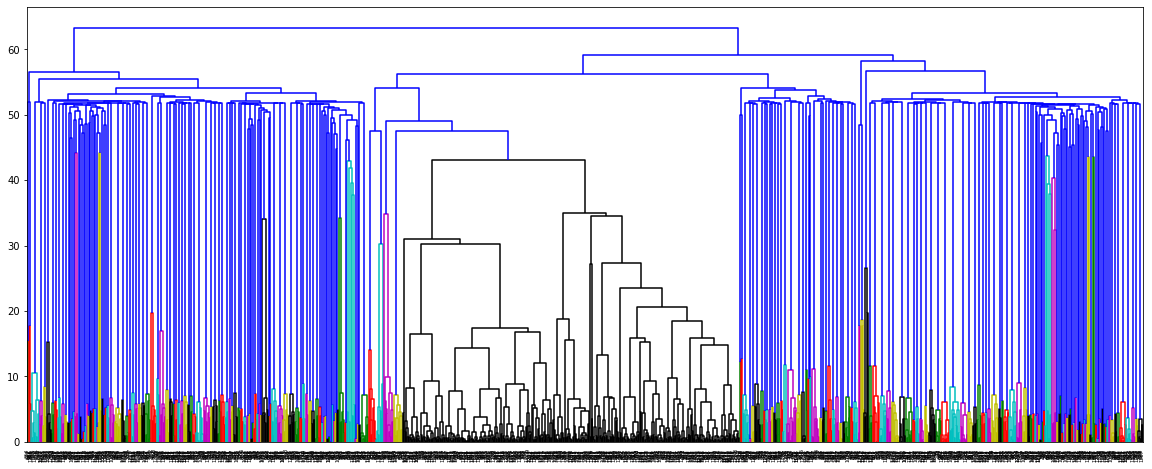

In [91]:
# Generate a dendrogram
plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

## Deep Learning


In [22]:
# Split data into features and target
X = mv_encoded.drop(columns=['imdbrating'], axis=1)
y = mv_encoded['imdbrating'].values

In [23]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Check number of data points
n = len(X_train_scaled[0])
n

673

In [26]:

import tensorflow as tf
from tensorflow import keras
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(tf.keras.layers.Dense(units=17, activation='relu', input_dim=673))
# Second hidden layer

nn.add(tf.keras.layers.Dense(units=10, activation='relu'))
# Output layer

nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                11458     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 11,649
Trainable params: 11,649
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Train on 849 samples, validate on 150 samples
Epoch 1/100
849/849 [==============================] - 2s 2ms/sample - loss: -0.1636 - accuracy: 0.0000e+00 - val_loss: -3.8102 - val_accuracy: 0.0000e+00
Epoch 2/100
849/849 [==============================] - 0s 254us/sample - loss: -11.0413 - accuracy: 0.0000e+00 - val_loss: -11.2643 - val_accuracy: 0.0000e+00
Epoch 3/100
849/849 [==============================] - 0s 366us/sample - loss: -24.6691 - accuracy: 0.0000e+00 - val_loss: -21.1313 - val_accuracy: 0.0000e+00
Epoch 4/100
849/849 [==============================] - 0s 263us/sample - loss: -44.3504 - accuracy: 0.0000e+00 - val_loss: -35.2294 - val_accuracy: 0.0000e+00
Epoch 5/100
849/849 [==============================] - 0s 344us/sample - loss: -73.7261 - accuracy: 0.0000e+00 - val_loss: -56.4161 - val_accuracy: 0.0000e+00
Epoch 6/100
849/849 [==============================] - 0s 270us/sample - loss: -117.0075 - accuracy: 0.0000e+00 - val_loss: -86.8926 - val_accuracy: 0.0000e+00
Epo

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

334/1 - 0s - loss: -4.4546e+05 - accuracy: 0.0000e+00
Loss: -455783.78686377243, Accuracy: 0.0


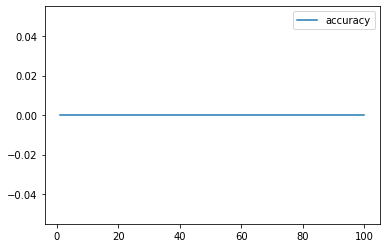

In [30]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

## Second attempt


In [31]:
# Drop more columns
mv_sec_df = mv_red_df.drop(columns=['star'])
mv_sec_df

,rated,metascore,imdbrating,genre,profit,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,PG-13,74.0,8.8,Action,676836967.0,8.8,87.0,74.0
1,PG-13,57.0,7.0,Action,423933331.0,7.0,72.0,57.0
2,R,63.0,8.2,Mystery,214805697.0,8.2,68.0,63.0
3,PG-13,69.0,7.5,Action,-11082026.0,7.5,82.0,69.0
4,PG-13,30.0,6.0,Comedy,191457301.0,6.0,11.0,30.0
...,...,...,...,...,...,...,...,...
1712,PG,17.0,6.7,Drama,33026103.0,6.7,56.0,17.0
1714,PG-13,39.0,4.5,Comedy,54747725.0,4.5,11.0,39.0
1718,PG-13,52.0,5.9,Drama,-2249971.0,5.9,52.0,52.0
1729,R,10.0,5.9,Biography,15354152.0,5.9,42.0,10.0


In [33]:
# Encode categorical data to numerical
mv_encoded = pd.get_dummies(mv_sec_df)
mv_encoded.shape

(1333, 27)

In [34]:
# Split data into features and target
X = mv_encoded.drop(columns=['imdbrating'], axis=1)
y = mv_encoded['imdbrating'].values

In [35]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
# Check number of data points
n = len(X_train_scaled[0])
n

26

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(tf.keras.layers.Dense(units=52, activation='relu', input_dim=26))
# Second hidden layer

nn.add(tf.keras.layers.Dense(units=30, activation='relu'))
# Output layer

nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the structure of the model
nn.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 52)                1404      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1590      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 3,025
Trainable params: 3,025
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile the model

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Train on 849 samples, validate on 150 samples
Epoch 1/100
849/849 [==============================] - 3s 4ms/sample - loss: -3.1058 - accuracy: 0.0000e+00 - val_loss: -8.7971 - val_accuracy: 0.0000e+00
Epoch 2/100
849/849 [==============================] - 0s 302us/sample - loss: -16.2865 - accuracy: 0.0000e+00 - val_loss: -23.2054 - val_accuracy: 0.0000e+00
Epoch 3/100
849/849 [==============================] - 0s 298us/sample - loss: -36.2152 - accuracy: 0.0000e+00 - val_loss: -48.0396 - val_accuracy: 0.0000e+00
Epoch 4/100
849/849 [==============================] - 0s 283us/sample - loss: -70.5319 - accuracy: 0.0000e+00 - val_loss: -91.4011 - val_accuracy: 0.0000e+00
Epoch 5/100
849/849 [==============================] - 0s 268us/sample - loss: -127.3906 - accuracy: 0.0000e+00 - val_loss: -161.9510 - val_accuracy: 0.0000e+00
Epoch 6/100
849/849 [==============================] - 0s 291us/sample - loss: -215.9129 - accuracy: 0.0000e+00 - val_loss: -268.3073 - val_accuracy: 0.0000e+00


In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

334/1 - 0s - loss: -9.6212e+05 - accuracy: 0.0000e+00
Loss: -1010492.1564371258, Accuracy: 0.0


## Thrid attempt

In [43]:
# drop more colomns
mv_rd_df = mv_sec_df.drop(columns=['profit'])
mv_rd_df.shape

(1333, 7)

In [44]:
# Encode categorical data to numerical
mv_encoded = pd.get_dummies(mv_rd_df)
mv_encoded.shape

(1333, 26)

In [45]:
# Split data into features and target
X = mv_encoded.drop(columns=['imdbrating'], axis=1)
y = mv_encoded['imdbrating'].values

In [46]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [47]:
# Check number of data points
n = len(X_train_scaled[0])
n

26

In [48]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(tf.keras.layers.Dense(units=52, activation='relu', input_dim=26))
# Second hidden layer

nn.add(tf.keras.layers.Dense(units=30, activation='relu'))
# Output layer

nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 52)                1404      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1590      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 3,025
Trainable params: 3,025
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile the model

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=200)

Train on 849 samples, validate on 150 samples
Epoch 1/200
849/849 [==============================] - 3s 3ms/sample - loss: -6.0807 - accuracy: 0.0000e+00 - val_loss: -12.6496 - val_accuracy: 0.0000e+00
Epoch 2/200
849/849 [==============================] - 0s 339us/sample - loss: -19.6557 - accuracy: 0.0000e+00 - val_loss: -32.7648 - val_accuracy: 0.0000e+00
Epoch 3/200
849/849 [==============================] - 0s 295us/sample - loss: -45.6546 - accuracy: 0.0000e+00 - val_loss: -70.5372 - val_accuracy: 0.0000e+00
Epoch 4/200
849/849 [==============================] - 0s 382us/sample - loss: -93.4737 - accuracy: 0.0000e+00 - val_loss: -138.1319 - val_accuracy: 0.0000e+00
Epoch 5/200
849/849 [==============================] - 0s 279us/sample - loss: -175.4766 - accuracy: 0.0000e+00 - val_loss: -249.9085 - val_accuracy: 0.0000e+00
Epoch 6/200
849/849 [==============================] - 0s 303us/sample - loss: -307.3769 - accuracy: 0.0000e+00 - val_loss: -421.1070 - val_accuracy: 0.0000e+0

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

334/1 - 0s - loss: -8.6453e+06 - accuracy: 0.0000e+00
Loss: -9127014.844311377, Accuracy: 0.0
